# Exercise 3: ML Workflow, Regression and Classification
10/10/2022 (Author: Sophia Kuhn)
09/10/2023 (Updated: Vera Balmer)

Course: Scientific Machine and Deep Learning for Design and Construction in Civil Engineering by M. A. Kraus, D. Griego and R.Rust

For Questions on this Exercise: vera.balmer@ai.ethz.ch

## Notebook Content
- 1.0 Standard ML-Workflow
- 2.0 Regression
    - 2.1 Simple Linear Regression
    - 2.2 Multivariable Linear Regression
        - (multi)collinearity
        - variable significance
        - considering interaction of features
- 3.0 Classification
    - Training of Decision Trees: Classification
    - Parameter tuning with Grid search and Cross Validation



## 1.0 Standard ML Workflow



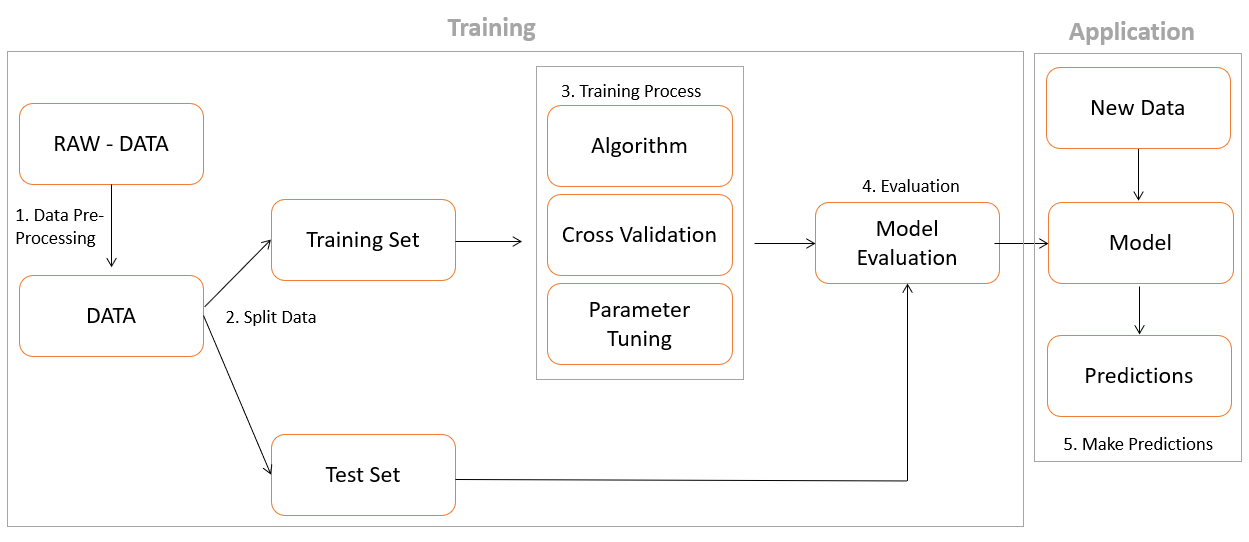

In [1]:
from IPython.display import Image
Image("MLWorkflow.png")

# 2.0 Regression Example

In [2]:
# import packages
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Import data

We import the data set that we pre-processed in the last exercise.

In [5]:
# import raw data set
df = pd.read_csv("Network_TiedArchBridges_Preprocessed.csv", delimiter=',')


In [6]:
# show head of dataFrame
df.head()

Unnamed: 0                   Name    Year Country           Function  \
0           0         Agoishi Bridge  1985.0   Japan        Road Bridge   
1           2            Akio Bridge  1968.0   Japan        Road Bridge   
2           3  Amelia Earhart Bridge  2012.0     USA        Road Bridge   
3           6           Åsnes Bridge  2011.0  Norway        Road Bridge   
4          11          Bent Bridge 1  2011.0     USA  Pedestrian Bridge   

  Material Arch             Material Deck Coordinates N / S Coordinates E / W  \
0         Steel  Steel-Concrete Composite  34° 13' 11.52" N  135° 8' 44.43" E   
1         Steel  Steel-Concrete Composite  34° 26' 23.04" N  132° 29' 0.59" E   
2         Steel  Steel-Concrete Composite      39°33'34.0"N      95°06'48.4"W   
3         Steel  Steel-Concrete Composite      64°18'34.7"N      11°13'06.3"E   
4         Steel       Reinforced Concrete      37°19'33.7"N     121°51'38.9"W   

   Span [m]  Rise of Arch [m]  Rise-Span Ratio  Width Tie Backs [m]  \
0     163.4              26.0         6.284615                10.25   
1     110.0              17.0         6.470588                 6.00   
2     160.6              26.5         6.060377                23.80   
3     111.0              18.0         6.166667                 9.00   
4      82.3               6.7        12.283582                 4.20   

  Horizontal Arch Inclination   Arch Bracing  
0                         Yes   Cross Girder  
1                         Yes   Cross Girder  
2                          No  Diamond Truss  
3                          No        K-Truss  
4                         Yes  Diamond Truss

In [7]:
# print shape
df.shape

(64, 15)

In [12]:
# Structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   64 non-null     int64  
 1   Name                         64 non-null     object 
 2   Year                         64 non-null     float64
 3   Country                      64 non-null     object 
 4   Function                     64 non-null     object 
 5   Material Arch                64 non-null     object 
 6   Material Deck                64 non-null     object 
 7   Coordinates N / S            64 non-null     object 
 8   Coordinates E / W            64 non-null     object 
 9   Span [m]                     64 non-null     float64
 10  Rise of Arch [m]             64 non-null     float64
 11  Rise-Span Ratio              64 non-null     float64
 12  Width Tie Backs [m]          64 non-null     float64
 13  Horizontal Arch Inclin

## 2.1 Simple Linear Regression




#### Motivation

We saw last time that we had many missing data for our Rise of Arch feature. Which limited the number of Bridges in our pre-processed data set as we dropped all the bridges with missing Rise of Arch information. 



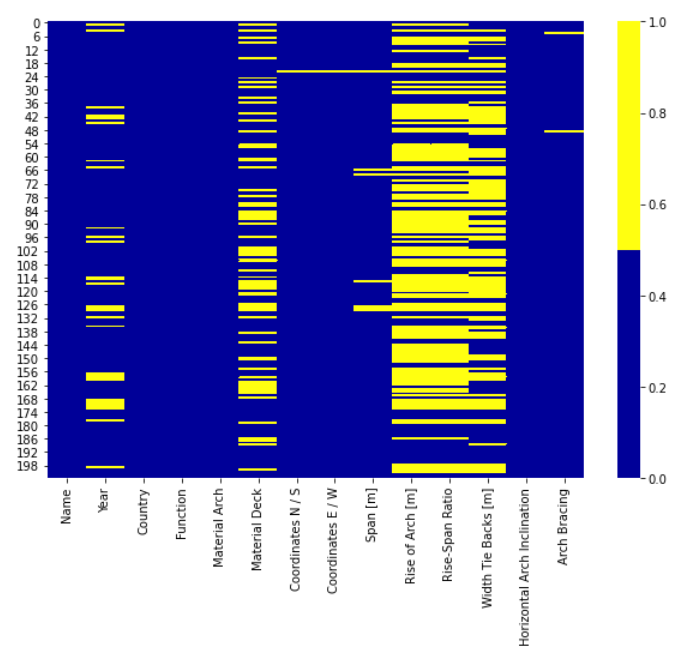

In [13]:
from IPython.display import Image
Image("missingData.png")

So it may be useful to predict the Rise of Arch feature from the remaining properties.
We have also seen that the Rise of arch exhibits a linear relationship with the Span of the Bridge.


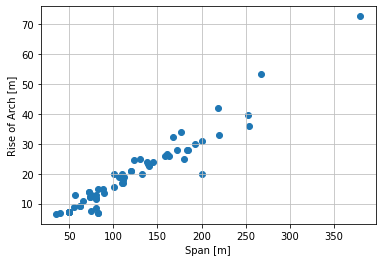

In [14]:
plt.scatter(df['Span [m]']  ,df['Rise of Arch [m]'])

plt.xlabel('Span [m]')
plt.ylabel('Rise of Arch [m]')
plt.grid(True,linestyle='-',color='0.75')


One possible approach would therefore be that we build a linear regression model predicting the continuous variable `Rise of Arch [m]` of the bridge from the `Span [m]`.

So we start by only using the span as single independent feature. And the rise of arch as our independent variable.

This means we are fitting the following function:

$y=m x+b$

𝑚 and 𝑏 are the variables our algorithm will try to “learn” to produce the most accurate predictions.

In [15]:
# extract features of interest
df_Span_Rise = pd.DataFrame(df[['Span [m]', 'Rise of Arch [m]']])
print(df_Span_Rise.head())
print('Shape',df_Span_Rise.shape)


   Span [m]  Rise of Arch [m]
0     163.4              26.0
1     110.0              17.0
2     160.6              26.5
3     111.0              18.0
4      82.3               6.7
Shape (64, 2)


#### Evaluation metrices
To evaluate our model we will use the following two metrics:

1. Mean Squared Error:
    
$$L=\frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-\hat{y}_{i}\right)^{2}$$
    
    
2. R_squared

$$R^{2}=1-\frac{\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}}{\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}}$$






#### Splitting the data

In [16]:
from sklearn.model_selection import train_test_split

y = df_Span_Rise['Rise of Arch [m]']
X = df_Span_Rise.drop(['Rise of Arch [m]'],axis=1)

# split data (70% training set; 30% test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=101)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44, 1), (20, 1), (44,), (20,))

#### Training the model

In [17]:
# train the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#train model
model1 = LinearRegression().fit(X_train, y_train)

# calculate r2 and MSE for training set
y_pred_train = model1.predict(X_train)
R_squared = r2_score(y_train, y_pred_train)
MSE_train = mean_squared_error(y_train, y_pred_train)


print('R_squared:', R_squared)
print('MSE:',MSE_train)

# show fitted coefficients and intercept
intercept = model1.intercept_
coefficients = model1.coef_

print('Intercep (b):', intercept)
print('Coefficient (m):', coefficients)



R_squared: 0.9229861621495611
MSE: 12.8292562182508
Intercep (b): -2.119270490739492
Coefficient (m): [0.18151527]


#### Evaluate Model

In [18]:
# compute out-of-sample R_squared and Mean_squared_error

y_pred = model1.predict(X_test)
OSR_squared=r2_score(y_test, y_pred)
MSE_test = mean_squared_error(y_test, y_pred)


# OSR_squared = model1.score(X_test, y_test)
print('OSR2:', OSR_squared)
print('MSE:', MSE_test)

OSR2: 0.9009918899273965
MSE: 9.521058940797694


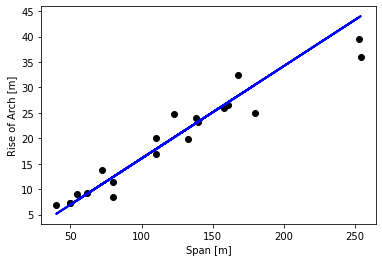

In [19]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(np.array(X_test),y_pred, color='blue', linewidth=2)

plt.xlabel('Span [m]')
plt.ylabel('Rise of Arch [m]')


plt.show()

## 2.2 Multivariable Linear Regression

Here we have one dependent variable `y` and multiple independent features `X`.


$\mathrm{y}=\alpha+\mathrm{x}_{1} \beta_{1}+\mathrm{x}_{2} \beta_{2}+\ldots+\mathrm{x}_{\mathrm{k}} \beta_{\mathrm{k}}+\varepsilon$


#### Import data

As an example for multivariable linear regression we build a model to predict the strength of concrete.

Explanation of features in the data set [1]:

$$
\begin{array}{ll}
\text { Variable } & \text { Description } \\
\hline \text { Cement } & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \begin{array}{l}
\text { Blast Furnace } \\
\text { Slag }
\end{array} & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \text { Fly Ash } & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \text { Water } & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \text { Superplasticizer } & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \text { Coarse Aggregate } & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \text { Fine Aggregate } & \mathrm{kg} \text { in a } m^{3} \text { of mixture } \\
\hline \text { Age } & \text { Age (in days) of concrete mix } \\
\hline \text { Concrete } & \text { measure in megapascals (MPa) } \\
\text { Compressive } & \\
\text { Strength } & \\
\hline
\end{array}
$$

In [20]:
# Import of training data set which has been provided
df_train_concrete = pd.read_csv("concrete_train.csv")
df_test_concrete  = pd.read_csv("concrete_test.csv")
df_train_concrete .info()
df_train_concrete .head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              721 non-null    float64
 1   Blast_Furnace_Slag  721 non-null    float64
 2   Fly_Ash             721 non-null    float64
 3   Water               721 non-null    float64
 4   Superplasticizer    721 non-null    float64
 5   Coarse_Aggregate    721 non-null    float64
 6   Fine_Aggregate      721 non-null    float64
 7   Age                 721 non-null    int64  
 8   Strength            721 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 50.8 KB


Cement  Blast_Furnace_Slag  Fly_Ash  Water  Superplasticizer  \
0   251.4                 0.0    118.3  188.5               6.4   
1   339.0                 0.0      0.0  197.0               0.0   
2   250.0                 0.0     95.7  187.4               5.5   
3   233.8                 0.0     94.6  197.9               4.6   
4   350.0                 0.0      0.0  186.0               0.0   

   Coarse_Aggregate  Fine_Aggregate  Age  Strength  
0            1028.4           757.7   56     36.64  
1             968.0           781.0    7     20.97  
2             956.9           861.2   56     38.33  
3             947.0           852.2  100     34.56  
4            1050.0           770.0   28     34.29

#### Installation and import statsmodels package

In [21]:
# conda install -c anaconda statsmodels

In [22]:
import statsmodels.formula.api as smf

#### Training of model

To train the model we use the `OLS` function from the statsmodels library. 

We define the following formula:

$$Strength=\alpha+ \beta_{1} Cement+ \beta_{2} Blast_Furnace_Slag + \beta_{3} Fly_Ash+ \beta_{4} Water + \beta_{5} Superplasticizer  + \beta_{6} Coarse_Aggregate + \beta_{7} Fine_Aggregate + \beta_{8} Age $$



In [23]:

mlr_1 = smf.ols(formula='Strength ~ Cement + Blast_Furnace_Slag + Fly_Ash + Water + Superplasticizer + Coarse_Aggregate +Fine_Aggregate+ Age',
                 data=df_train_concrete ).fit()

print(mlr_1.summary())

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     134.8
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          4.40e-137
Time:                        11:06:07   Log-Likelihood:                -2705.7
No. Observations:                 721   AIC:                             5429.
Df Residuals:                     712   BIC:                             5471.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -34.8920     32

#### Check for collinearity

<AxesSubplot: >

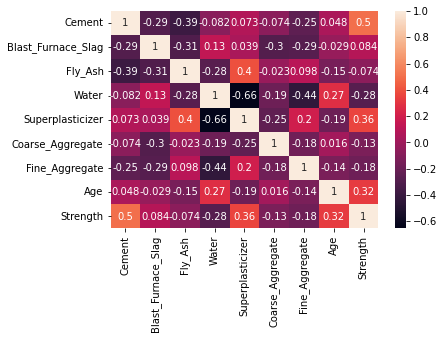

In [24]:
# check for collinearity between two features
corrMatrix=df_train_concrete .corr()
sns.heatmap(corrMatrix, annot=True)

#### Check for multicollinearity

"Multicollinearity exists whenever an independent variable is highly correlated with one or more of the other independent variables in a multiple regression equation." (see:https://link.springer.com/chapter/10.1007/978-0-585-25657-3_37)

The Variance Inflation Factor (VIF) can be used to detect multicollinearity within the independent variables of the model.

$$\mathrm{VIF}_{j}=\frac{1}{1-R_{j}^{2}}$$

We calculate the VIF for each independent Variable of `X`. If the VIF value of any feature is >5  then multicollinearity is likely present.

It is important to remove present Multicollinearity as it reduces the precision with which the coefficients are estimated. This means the standard error of the coefficient estimation is relatively large which can lead to a reduction of prediction performance of the model.



In [25]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(df, columns):
    
    values = sm.add_constant(df[columns]).values  
    # the dataframe passed to VIF must include the intercept term -> add column
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    
    return pd.Series(vif[1:], index=columns)

In [26]:
#calculate VIF Value
X_cols= df_train_concrete .columns.drop('Strength')
VIF(df_train_concrete , X_cols)

Cement                7.771301
Blast_Furnace_Slag    7.436248
Fly_Ash               6.088034
Water                 7.305806
Superplasticizer      2.934533
Coarse_Aggregate      5.189088
Fine_Aggregate        7.309983
Age                   1.105113
dtype: float64

The high VIF values show that multicollinearity is present within the independent variables of our model. We therefore choose a feature with high VIF value which is removed. This is chosen so that it results in the smallest reduction of the R2 value.

#### Train of second model

We choose to remove `Fine_Aggregate`.

To remove the feature the formular definition is changed to:

$$Strength=\alpha+ \beta_{1} Cement+ \beta_{2} Blast_Furnace_Slag + \beta_{3} Fly_Ash+ \beta_{4} Water + \beta_{5} Superplasticizer  + \beta_{6} Coarse_Aggregate + \beta_{7} Age $$



In [27]:

mlr_2 = smf.ols(formula='Strength ~ Cement + Blast_Furnace_Slag + Fly_Ash + Water + Superplasticizer + Coarse_Aggregate + Age',
                 data=df_train_concrete ).fit()

print(mlr_2.summary())

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     153.2
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.60e-137
Time:                        11:06:10   Log-Likelihood:                -2707.3
No. Observations:                 721   AIC:                             5431.
Df Residuals:                     713   BIC:                             5467.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             19.3138     10

In [28]:
#calc VIF Value
X_cols= df_train_concrete .columns.drop(['Strength','Fine_Aggregate'])
VIF(df_train_concrete , X_cols)

Cement                1.942272
Blast_Furnace_Slag    1.915736
Fly_Ash               2.343774
Water                 2.428075
Superplasticizer      2.802123
Coarse_Aggregate      1.548158
Age                   1.101928
dtype: float64

#### Sort out features with low significance

To see if a variable is statistically significant for the prediction of the dependent variable we can look at the p-values in the model summary above.

- low p-value (<0.025): high significance of the feature
- high p-value (>0.05): low significance of the feature


(See for more detailed infromation on p-values:https://blog.minitab.com/en/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients)


#### Training of model with only significant features

In our case the feature `Coarse_Aggregate` has a high p-value and therefore a low significance for the prediction of our dependant variable `Strength`. The feature can therfore be removed.

New formula definition: 

$$Strength=\alpha+ \beta_{1} Cement+ \beta_{2} Blast_Furnace_Slag + \beta_{3} Fly_Ash+ \beta_{4} Water + \beta_{5} Superplasticizer  + \beta_{6} Age $$


In [29]:

mlr_3 = smf.ols(formula='Strength ~ Cement + Blast_Furnace_Slag + Fly_Ash + Water + Superplasticizer + Age',
                 data=df_train_concrete ).fit()

print(mlr_3.summary())

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     178.7
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.50e-138
Time:                        11:06:10   Log-Likelihood:                -2707.5
No. Observations:                 721   AIC:                             5429.
Df Residuals:                     714   BIC:                             5461.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             25.9785      5

#### Model Evaluation 

In [30]:
# define Out-of-sample R2 function
def OSR2(model, df_train, df_test, dependent_var):   
    
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)    
    
    return 1 - SSE/SST


In [31]:
# calculate r2 calue for test set
print('OSR2:', round(OSR2(mlr_3, df_train_concrete , df_test_concrete, 'Strength'), 5))

OSR2: 0.63404


#### Considering the interaction of features

To consider the interaction between two features we can include the following new variables in the linear regression model:


$$Strength=\alpha+ \beta_{1} Cement+ \beta_{2} Blast_Furnace_Slag + \beta_{3} Fly_Ash+ \beta_{4} Water + \beta_{5} Superplasticizer  + \beta_{6} Age $$


New features:

$$ + \beta_{6} Superplasticizer*Age$$

$$ + \beta_{7} Fly_Ash*Age $$

$$ + \beta_{8} Fly_Ash*Water$$

$$ + \beta_{9} Fly_Ash*Superplasticizer$$

$$ + \beta_{10} Water*Superplasticizer$$


In [32]:
import statsmodels.formula.api as smf

mlr_4 = smf.ols(formula='Strength ~ Cement + Blast_Furnace_Slag + Fly_Ash + Water + Superplasticizer + Age + Superplasticizer*Age + Fly_Ash*Age  + Fly_Ash*Water + Fly_Ash*Superplasticizer + Water*Superplasticizer',
                 data=df_train_concrete ).fit()

print(mlr_4.summary())

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     153.7
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          2.46e-179
Time:                        11:06:12   Log-Likelihood:                -2598.7
No. Observations:                 721   AIC:                             5221.
Df Residuals:                     709   BIC:                             5276.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#### Model Evaluation

In [33]:
print('OSR2:', round(OSR2(mlr_4, df_train_concrete , df_test_concrete, 'Strength'), 5))

OSR2: 0.70838


--> We can see that both the `R2` and the `OSR2` value increased significantly by considering the feature interactions.

# 3.0 Classification Example

As an example we built a classification decision tree model that predicts the `Arch Bracing` type of a Network-Tied-Arch Bridge.

In [34]:
# extract features of interest
cols=['Function','Span [m]','Rise of Arch [m]','Rise-Span Ratio',
     'Width Tie Backs [m]', 'Arch Bracing']
df_class = pd.DataFrame(df[cols])
df_class.head()

Function  Span [m]  Rise of Arch [m]  Rise-Span Ratio  \
0        Road Bridge     163.4              26.0         6.284615   
1        Road Bridge     110.0              17.0         6.470588   
2        Road Bridge     160.6              26.5         6.060377   
3        Road Bridge     111.0              18.0         6.166667   
4  Pedestrian Bridge      82.3               6.7        12.283582   

   Width Tie Backs [m]   Arch Bracing  
0                10.25   Cross Girder  
1                 6.00   Cross Girder  
2                23.80  Diamond Truss  
3                 9.00        K-Truss  
4                 4.20  Diamond Truss

<AxesSubplot: xlabel='count', ylabel='Arch Bracing'>

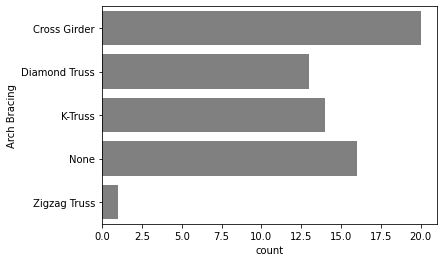

In [35]:
sns.countplot(y='Arch Bracing', data=df_class,color='grey')

<AxesSubplot: xlabel='count', ylabel='Arch Bracing'>

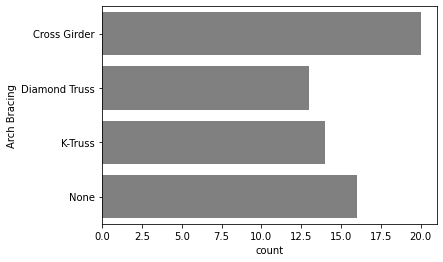

In [36]:
# drop rows with ZigzagTruss
df_class=df_class[df_class['Arch Bracing'] != 'Zigzag Truss']

sns.countplot(y='Arch Bracing', data=df_class,color='grey')

#### Splitting the data

"stratify" makes sure that each set contains approximately the same percentage of samples of each category.

In [37]:
y = df_class['Arch Bracing']
X = df_class.drop(['Arch Bracing'],axis=1)

# split data (70% training set; 30% test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    stratify =df_class['Arch Bracing'],
                                                    random_state=88)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44, 5), (19, 5), (44,), (19,))

<AxesSubplot: xlabel='count', ylabel='Arch Bracing'>

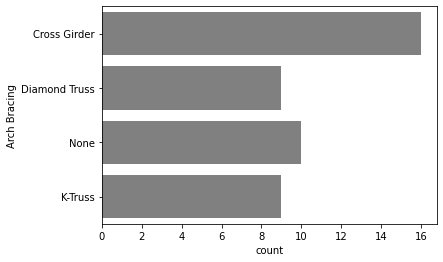

In [38]:
sns.countplot(y=y_train,color='grey')

<AxesSubplot: xlabel='count', ylabel='Arch Bracing'>

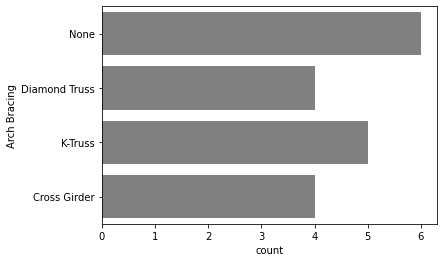

In [39]:
sns.countplot(y=y_test,color='grey')

#### Encoding of categorical features

In [37]:
# create dummy variables
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)
X_train.head()

Span [m]  Rise of Arch [m]  Rise-Span Ratio  Width Tie Backs [m]  \
62     219.0             42.00         5.214286                 32.0   
21     158.0             26.00         6.076923                 21.7   
54      49.8              7.20         6.916667                 20.7   
44      73.5             12.25         6.000000                 18.5   
30     192.8             30.00         6.426667                  8.0   

    Function_Railway Bridge  Function_Road Bridge  
62                        1                     0  
21                        0                     1  
54                        0                     1  
44                        0                     1  
30                        0                     1

### Train of first model

As splitting criterion we define the `Gini Index`(see Lecture 05).

In [39]:
from sklearn.tree import DecisionTreeClassifier

dt_1= DecisionTreeClassifier(min_samples_leaf=5,
                             random_state = 88,
                            criterion = 'gini',
                            max_depth=3,
                            ccp_alpha = 0.1)

dt_1 = dt_1.fit(X_train, y_train)

Node count = 3


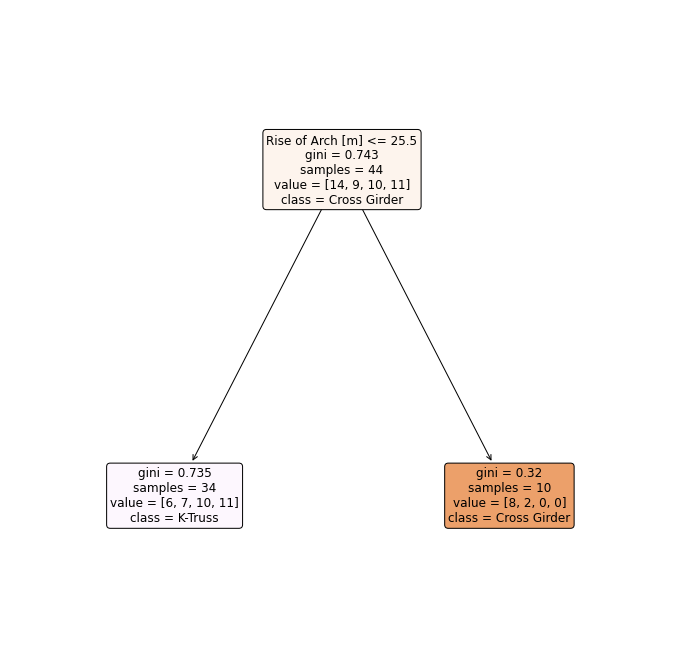

In [40]:
# plot trained desision tree
from sklearn.tree import plot_tree

print('Node count =', dt_1.tree_.node_count)
plt.figure(figsize=(12,12))
plot_tree(dt_1, 
          feature_names=X_train.columns, 
          class_names=y_train.unique(), 
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12) 
plt.show()

#### Evaluation

In [41]:
# make predictions with trained model
y_pred_train = dt_1.predict(X_train)
y_pred_test = dt_1.predict(X_test)

In [42]:
# calculate evaluation metrics
from sklearn.metrics import accuracy_score

acc_train=accuracy_score(y_train, y_pred_train)
acc_test=accuracy_score(y_test, y_pred_test)
print('Acc_train:',round(acc_train,5))
print('Acc_test:',round(acc_test,5))

Acc_train: 0.43182
Acc_test: 0.42105


### Train second classification tree

In [44]:
dt_2= DecisionTreeClassifier(min_samples_leaf=2,
                             random_state = 88,
                            criterion = 'gini',
                            max_depth=100,
                            ccp_alpha = 0.0001)

dt_2 = dt_2.fit(X_train, y_train)

Node count = 27


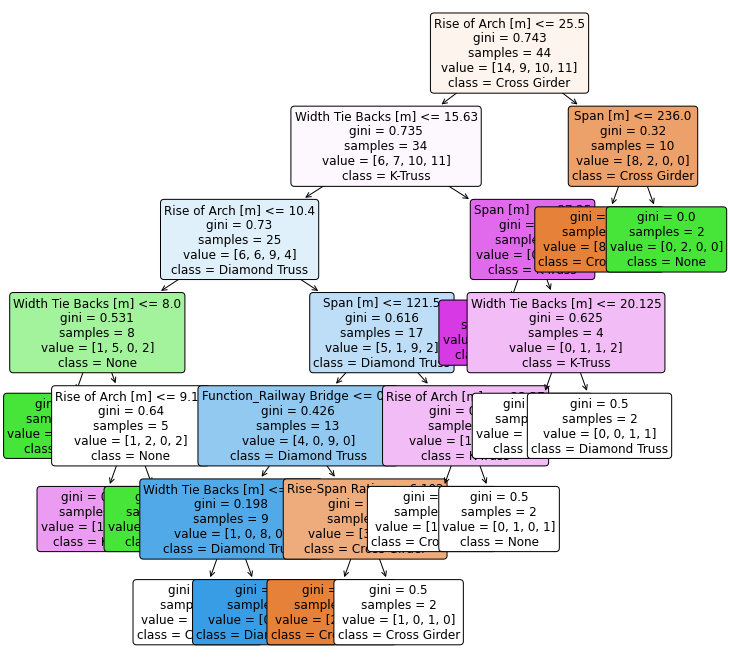

In [45]:
print('Node count =', dt_2.tree_.node_count)
plt.figure(figsize=(12,12))
plot_tree(dt_2, 
          feature_names=X_train.columns, 
          class_names=y_train.unique(), 
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12) 
plt.show()

##### Evaluation of Model 2

In [46]:
# make predictions with trained model
y_pred_train = dt_2.predict(X_train)

y_pred_test = dt_2.predict(X_test)

In [47]:
# calculate evaluation metrics
from sklearn.metrics import accuracy_score

acc_train=accuracy_score(y_train, y_pred_train)
acc_test=accuracy_score(y_test, y_pred_test)
print('Acc_train:',round(acc_train,5))
print('Acc_test:',round(acc_test,5))

Acc_train: 0.84091
Acc_test: 0.63158


--> We see that our decision tree is overfitted to our training data set.

### Grid Search with Cross Validation

Grid search can be used to determine appropriate hyperparameters for the algorithm. 
In this example we apply grid search to determine a good value for the `cpp_alpha` value (used for the pruning of the tree). 
We do this by defining multiple `cpp_alpha` values which are all tested individually.

Each defined `cpp_alpha` value is tested with cross validation to prevent overfitting . Here we apply 10-fold cross validation. This means our training set is split into 10 sub-datasets of equal size. Then one of each data set is removed and the model is trained on the remaining 9 sub-data sets. The 10th subset is used as validation set to estimate the performance of the trained model. This procedure is repeated until each subset was removed once. As validation score we use the accuracy.





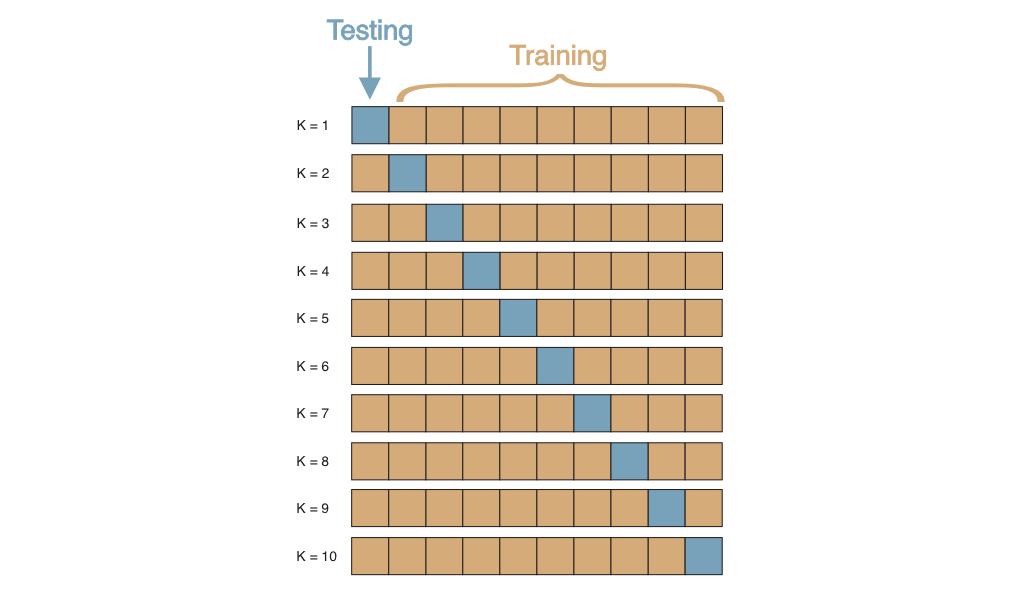

In [49]:
from IPython.display import Image
Image("10_foldCrossValidation.png") # from [3]

In [50]:
from sklearn.model_selection import GridSearchCV

#Exhaustive search over specified parameter values for an estimator.
#define a dict
grid_values = {'ccp_alpha': np.linspace(0.0, 0.10,50), 
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [3],
               'random_state': [88]} 
            
dt_3 = DecisionTreeClassifier()

dtc_cv_acc = GridSearchCV(dt_3, param_grid = grid_values, scoring = 'accuracy', cv=10, verbose=1) 


#fitting of the classification tree to the data
dtc_cv_acc.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


c:\Users\vbalmer\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.        , 0.00204082, 0.00408163, 0.00612245, 0.00816327,
       0.01020408, 0.0122449 , 0.01428571, 0.01632653, 0.01836735,
       0.02040816, 0.02244898, 0.0244898 , 0.02653061, 0.02857143,
       0.03061224, 0.03265306, 0.03469388, 0.03673469, 0.03877551,
       0.04081633, 0.04285714, 0.04489796, 0.04693878, 0.04897959,
       0.05102041, 0.05306122, 0.05510204, 0.05714286, 0.05918367,
       0.06122449, 0.06326531, 0.06530612, 0.06734694, 0.06938776,
       0.07142857, 0.07346939, 0.0755102 , 0.07755102, 0.07959184,
       0.08163265, 0.08367347, 0.08571429, 0.0877551 , 0.08979592,
       0.09183673, 0.09387755, 0.09591837, 0.09795918, 0.1       ]),
                         'max_depth': [3], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
             scoring='accuracy', verbose=1)

In [51]:
acc = dtc_cv_acc.cv_results_['mean_test_score'] 

ccp = dtc_cv_acc.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy': acc}).tail(10)

ccp alpha  Validation Accuracy
40  0.081633                0.360
41  0.083673                0.360
42  0.085714                0.385
43  0.087755                0.340
44  0.089796                0.340
45  0.091837                0.340
46  0.093878                0.340
47  0.095918                0.290
48  0.097959                0.290
49       0.1                0.290

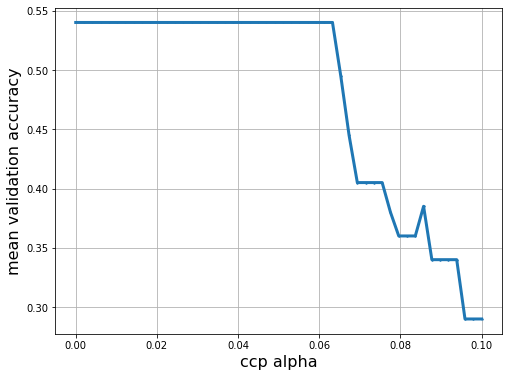

In [52]:
# plot mean accuracy of grid search
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp, acc, s=2)
plt.plot(ccp, acc, linewidth=3)
plt.grid(True, which='both')
plt.show()

The value of `ccp_alpha` is chosen that results in the highest accuracy score.

In [53]:
print('Grid best parameter ccp_alpha (max. accuracy): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtc_cv_acc.best_score_)

Grid best parameter ccp_alpha (max. accuracy):  0.0
Grid best score (accuracy):  0.54


Node count = 7


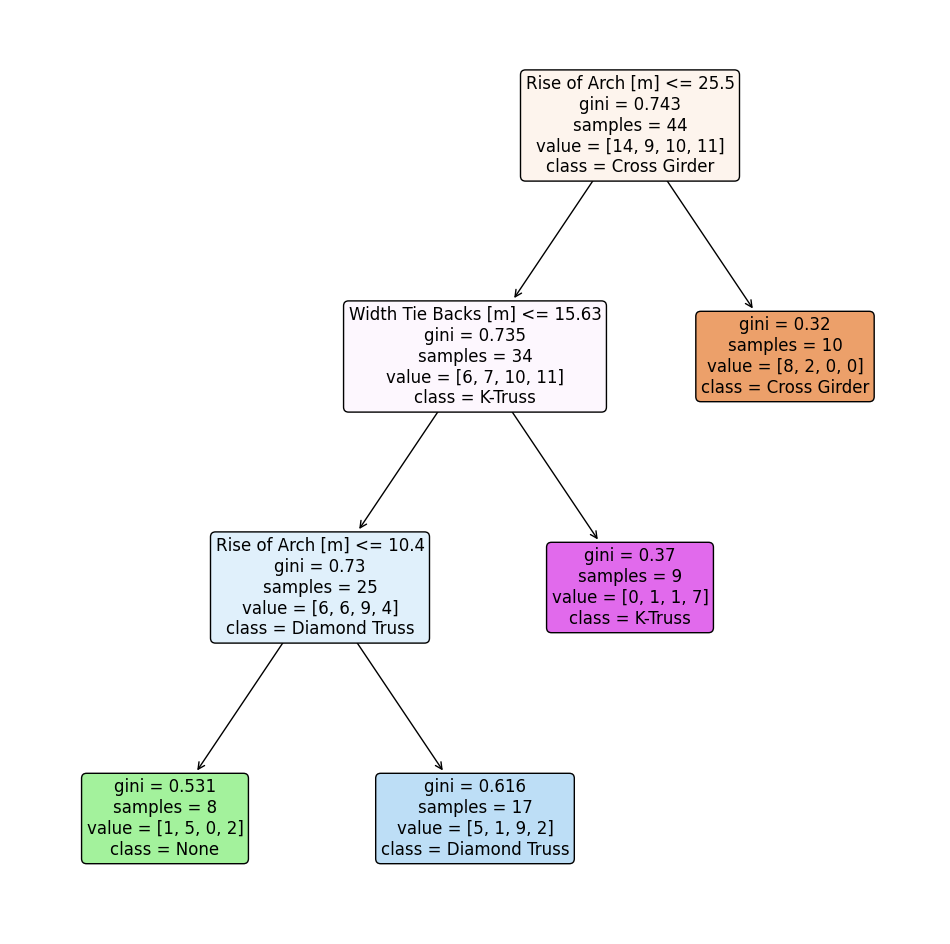

In [112]:
# plot tree
print('Node count =', dtc_cv_acc.best_estimator_.tree_.node_count)
plt.figure(figsize=(12,12))
plot_tree(dtc_cv_acc.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=y_train.unique(), 
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12) 
plt.show()

##### Evaluation

In [54]:
y_pred_train = dtc_cv_acc.best_estimator_.predict(X_train)
y_pred_test = dtc_cv_acc.best_estimator_.predict(X_test)

In [55]:
# calculate evaluation metrics
from sklearn.metrics import accuracy_score

acc_train=accuracy_score(y_train, y_pred_train)
acc_test=accuracy_score(y_test, y_pred_test)
print('Acc_train:',round(acc_train,5))
print('Acc_test:',round(acc_test,5))

Acc_train: 0.65909
Acc_test: 0.63158


#### Feature Importance

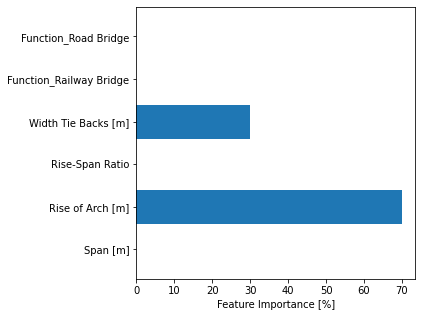

In [56]:
# plot feature importance
plt.figure(figsize=(5,5))
plt.barh(X_train.columns, 100*dtc_cv_acc.best_estimator_.feature_importances_)
plt.xlabel('Feature Importance [%]')
plt.show()

## In-Class Discussion:

    - What does the Feature Importance this tell us? 
    
    - How could we increase the prediction performance?

# References

- [1] Grigas, P. 2021, LAB 1: INTRO TO PYTHON, discussion notebooks, UC Berkeley
- [2] Kuhn, Sophia: Parametric Modelling and Generative Design - A Multi-Step Machine Learning Approach for Design and Optimization of Network Tied-Arch Bridges. Master's Thesis. IBK, ETH Zurich, 2021.
- [3] https://towardsdatascience.com/the-importance-of-k-fold-cross-validation-for-model-prediction-in-machine-learning-4709d3fed2ef
 
    